### Network Visualization
This page provides visualization of interaction between characters in the movie lord of the rings. The data is from "http://moviegalaxies.com/"

*Import the pacakge*   
*Use inline plots*  

In [1]:
import networkx as nx
import matplotlib
import urllib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

Load data from web using urllib pacakge. Then use networkx read_gexf function to create graph from the gexf file.

In [2]:
LordOfRings_gexf = urllib.urlopen("http://media.moviegalaxies.com/gexf/512.gexf")
LordOfRings=nx.read_gexf(LordOfRings_gexf)

#### Graph Diagram
Let's draw the graph. The name of characters (nodes) are stored on labels attribute of the node. Let's get the character names and use that as label for nodes

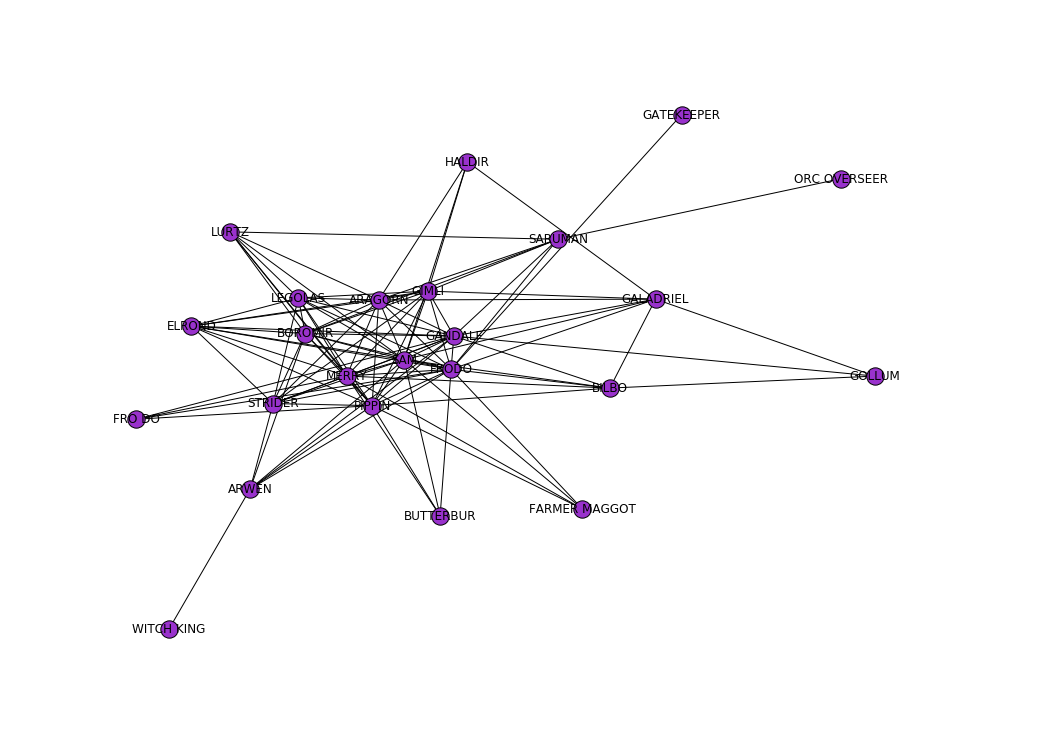

In [3]:
labels=nx.get_node_attributes(LordOfRings,"label")
nx.draw(LordOfRings,labels=labels,font_size=12,node_color="darkorchid")           

#### Diameter 
Compute diameter of the group. That is the greatest distance between two nodes (max of shortest path between two nodes).

In [4]:
print "Graph Diameter:",nx.diameter(LordOfRings)

Graph Diameter: 4


#### Density
Graph density - Number of edges/maximum possible edges. A graph with high density indicates a well connected graph

In [5]:
print "Graph Density: ",nx.density(LordOfRings)

Graph Density:  0.384057971014


#### Maximum Degree
Maximum degress of a graph is the maximum number of edges incident to a node. In the data we have choosen a edge represent a interaction. Hence a maximum edge denote the maximum number of interactions

In [6]:
degrees = nx.degree(LordOfRings)
max_degree=max(degrees,key=degrees.get)
print "Max degree (interaction) of the graph is ",degrees[max_degree]
print "Character with maximum interaction is",labels[max_degree]

Max degree (interaction) of the graph is  18
Character with maximum interaction is FRODO


#### Minimum Degree
Minimum degress of a graph is the minimum number of edges incident to a node.

In [7]:
min_degree=min(degrees,key=degrees.get)
print "Min degree (interaction) of the graph is ",degrees[min_degree]
print "Character with minimum interaction is",labels[min_degree]

Min degree (interaction) of the graph is  1
Character with minimum interaction is ORC OVERSEER


#### Visualize interaction
In order to gain more insight on the interaction we could draw the graph by setting the node size based on the degree of the node. This provides visualization of amount of interactions the characters had which could indicate the importance of the character in the movie

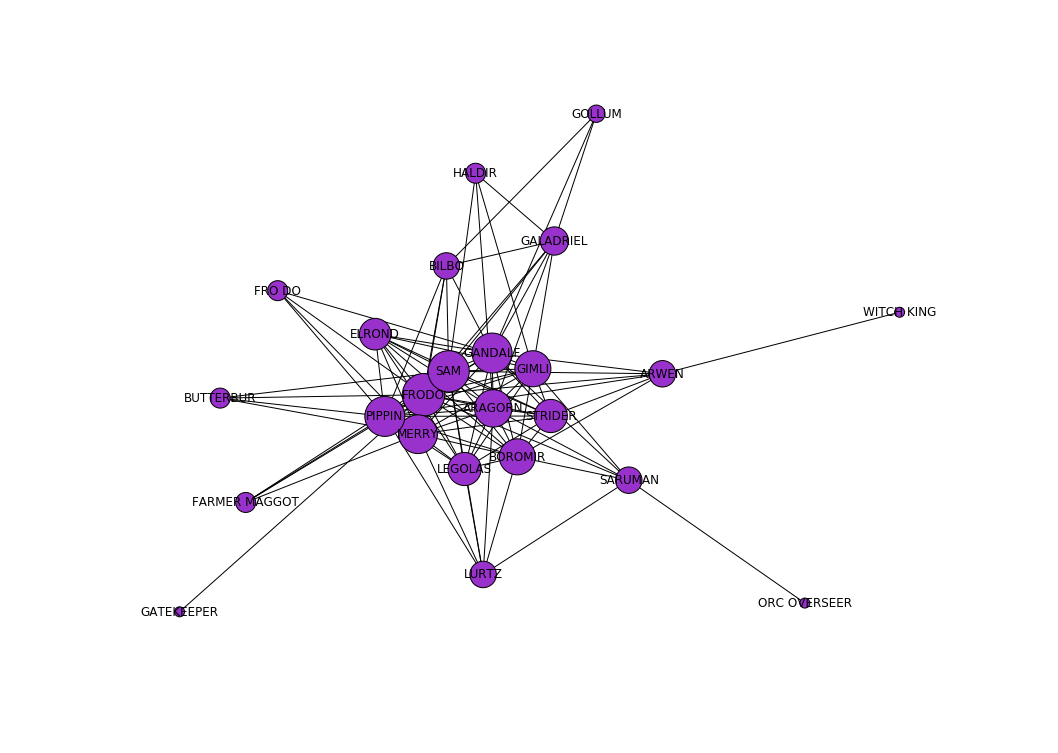

In [8]:
node_size = [d * 100 for d in degrees.values()]
node_size
nx.draw(LordOfRings,labels=labels,font_size=12,node_list=degrees.keys(),nodelist=degrees.keys(),
        node_size=node_size,node_color="darkorchid")

Let's change the layout of the graph so that the interactions are more clear

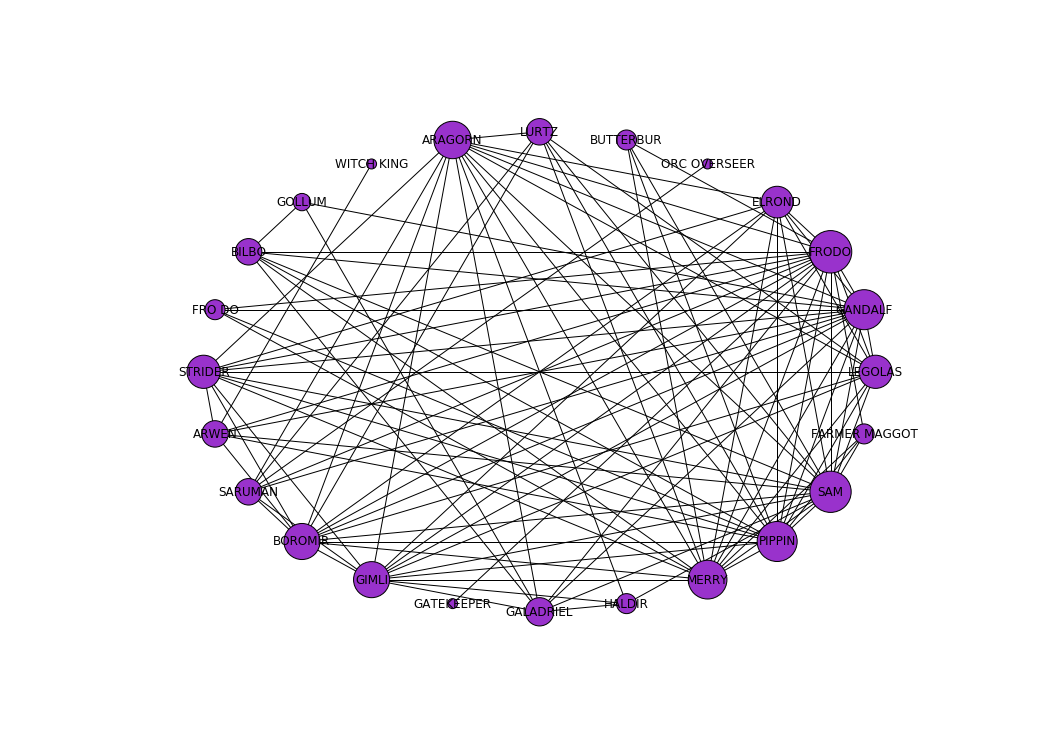

In [9]:
nx.draw(LordOfRings,labels=labels,font_size=12,node_list=degrees.keys(),node_size=node_size,
        nodelist=degrees.keys(),node_color="darkorchid",pos=nx.shell_layout(LordOfRings))

We could see that characters FRODO, GANDALF, ARAGORN etc. had many interactions and hence could be considered important characters.  